In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('train.csv')

# EDA (e.g., df.describe(), df.isnull().sum())

# Preprocessing
df['Cabin_Deck'] = df['Cabin'].str.split('/').str[0]
df['Cabin_Num'] = df['Cabin'].str.split('/').str[1]
df['Cabin_Side'] = df['Cabin'].str.split('/').str[2]
df.fillna(0, inplace=True)

# Encoding categorical variables
le = LabelEncoder()
df['HomePlanet'] = le.fit_transform(df['HomePlanet'].astype(str))

# Train-Test Split
X = df.drop(['Transported', 'PassengerId', 'Name'], axis=1)
y = df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Save Submission
submission = pd.DataFrame({'PassengerId': df['PassengerId'], 'Transported': y_pred})
submission.to_csv('submission.csv', index=False)


ValueError: could not convert string to float: 'F/575/P'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_csv('train.csv')

# Extract Cabin features
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)

# Fill missing values
df.fillna({
    'HomePlanet': 'Unknown',
    'CryoSleep': False,
    'Cabin_Deck': 'Unknown',
    'Cabin_Side': 'Unknown',
    'Destination': 'Unknown',
    'Age': df['Age'].median(),
    'RoomService': 0,
    'FoodCourt': 0,
    'ShoppingMall': 0,
    'Spa': 0,
    'VRDeck': 0
}, inplace=True)

# Define features and target
X = df.drop(['Transported', 'PassengerId', 'Name', 'Cabin', 'Cabin_Num'], axis=1)
y = df['Transported'].astype(int)

# One-hot encoding for categorical variables
categorical_features = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Cabin_Deck', 'Cabin_Side']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Save Submission
submission = pd.DataFrame({'PassengerId': df.loc[X_test.index, 'PassengerId'], 'Transported': y_pred})
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)


C:\Users\manoj\AppData\Local\Temp\ipykernel_10592\3290900804.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({


Accuracy: 0.78


C:\Users\manoj\AppData\Local\Temp\ipykernel_10592\871046485.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({


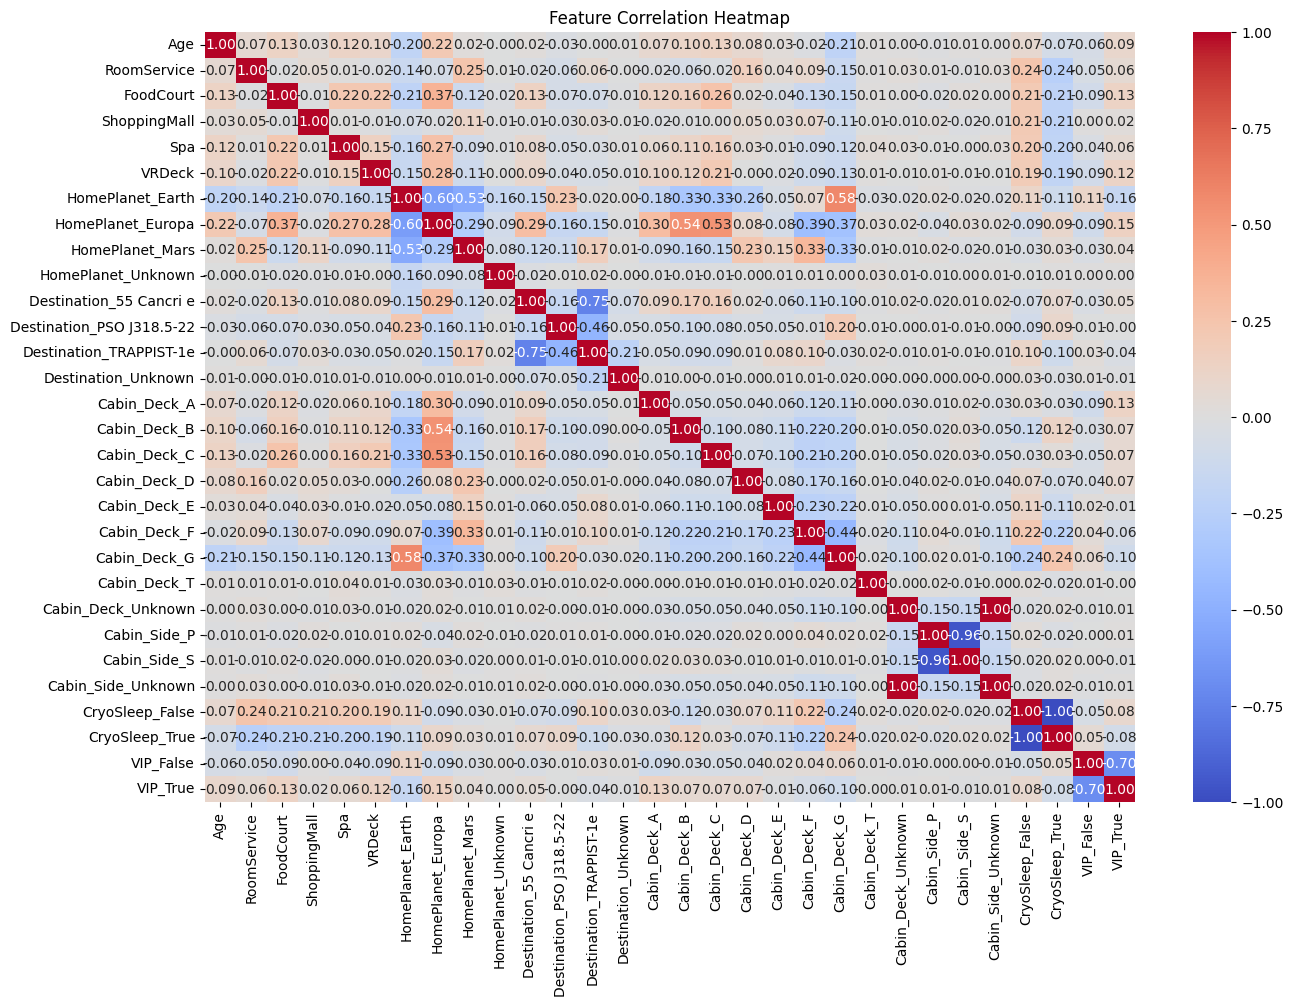

Reduced DataFrame shape: (8693, 20)


<bound method NDFrame.head of        Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0     39.0          0.0        0.0           0.0     0.0     0.0   
1     24.0        109.0        9.0          25.0   549.0    44.0   
2     58.0         43.0     3576.0           0.0  6715.0    49.0   
3     33.0          0.0     1283.0         371.0  3329.0   193.0   
4     16.0        303.0       70.0         151.0   565.0     2.0   
...    ...          ...        ...           ...     ...     ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0   
8689  18.0          0.0        0.0           0.0     0.0     0.0   
8690  26.0          0.0        0.0        1872.0     1.0     0.0   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0   
8692  44.0        126.0     4688.0           0.0     0.0    12.0   

      HomePlanet_Earth  HomePlanet_Unknown  Destination_55 Cancri e  \
0                False               False                    False   
1          

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')

# Fill missing values
df.fillna({
    'HomePlanet': 'Unknown',
    'CryoSleep': False,
    'Cabin': 'Unknown/0/Unknown',
    'Destination': 'Unknown',
    'Age': df['Age'].median(),
    'RoomService': 0,
    'FoodCourt': 0,
    'ShoppingMall': 0,
    'Spa': 0,
    'VRDeck': 0
}, inplace=True)

# Extract deck and side from Cabin
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Cabin', 'Cabin_Num'], axis=1, inplace=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'CryoSleep', 'VIP'])

# Convert Transported to int
y = df_encoded['Transported']
df_encoded['Transported'] = df_encoded['Transported'].astype(int)

df_encoded.drop('Transported', axis=1,inplace=True)
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify and remove highly correlated features
threshold = 0.5
correlated_features = set(
    correlation_matrix.columns[i] 
    for i in range(len(correlation_matrix.columns)) 
    for j in range(i) 
    if abs(correlation_matrix.iloc[i, j]) > threshold
)

df_reduced = df_encoded.drop(columns=correlated_features)
print("Reduced DataFrame shape:", df_reduced.shape)
df_reduced.head

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Separate features and target
X = df_reduced


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7849
Confusion Matrix:
[[650 211]
 [163 715]]


c:\Users\manoj\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:57:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.8/124.9 MB 1.8 MB/s eta 0:01:11
   ---------------------------------------- 1.0/124.9 MB 1.3 MB/s eta 0:01:34
   ---------------------------------------- 1.3/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 1.3/124.9 MB 1.3 MB/s eta 0:01:38
    --------------------------------------- 1.6/124.9 MB 1.1 MB/s eta 0:01:51
    --------------------------------------- 1.8/124.9 MB 1.0 MB/s eta 0:01:59
    --------------------------------------- 1.8/124.9 MB 1.0 MB/s eta 0:01:59
    --------------------------------------- 2.1/124.9 MB 946.9 kB/s eta 0:02:10
    --------------------------------------- 2.1/124.9 MB 946.9 kB/s eta 0:02:10
    --------------------------------------- 2.1/124.9 MB 946.9 kB/s eta 0:

C:\Users\manoj\AppData\Local\Temp\ipykernel_10592\2456304511.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({


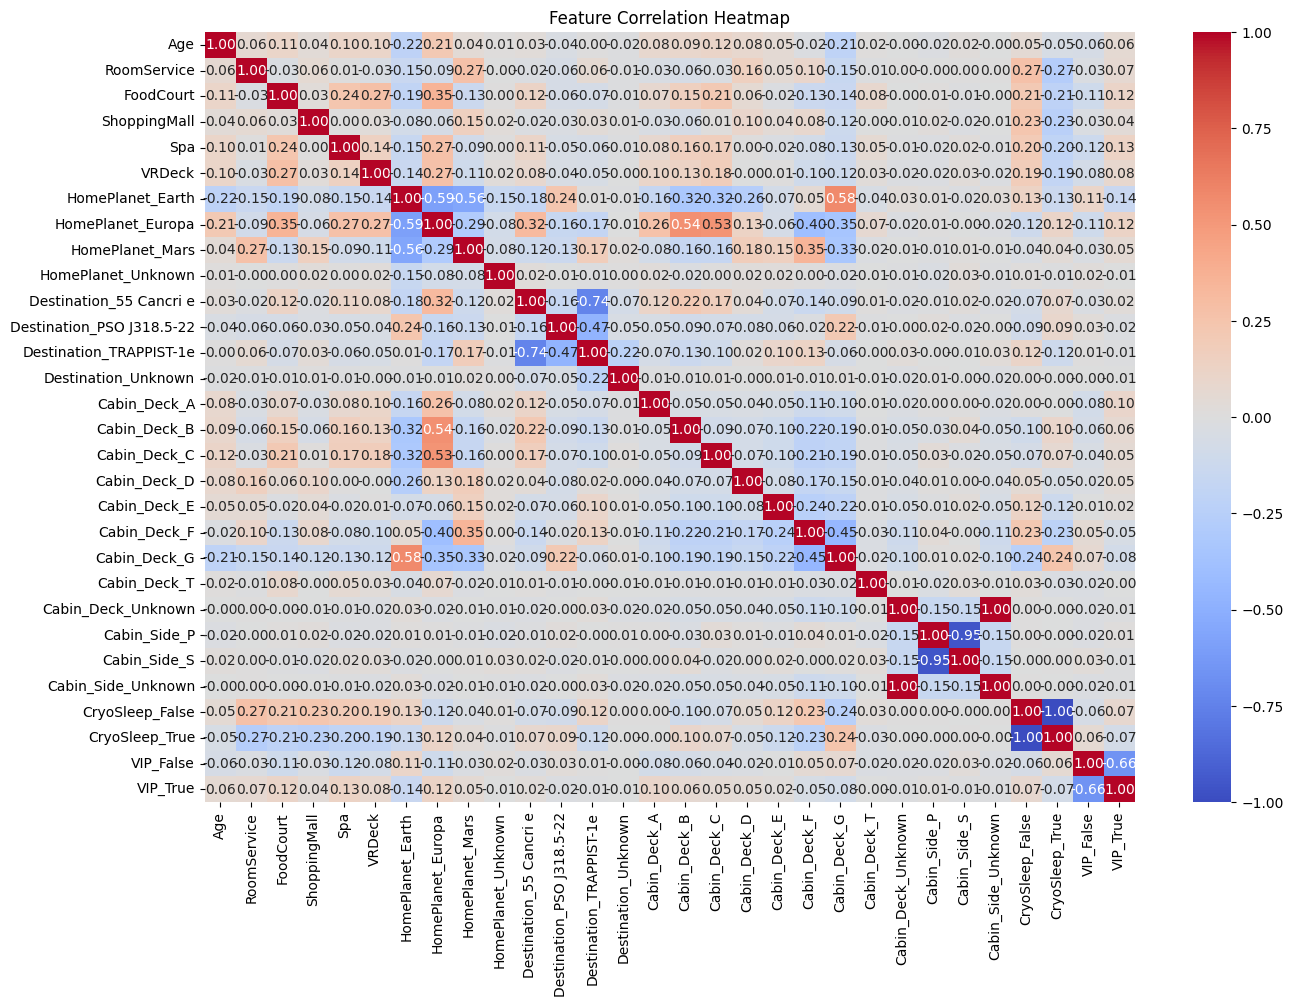

Reduced DataFrame shape: (4277, 20)


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('test.csv')

# Fill missing values
df.fillna({
    'HomePlanet': 'Unknown',
    'CryoSleep': False,
    'Cabin': 'Unknown/0/Unknown',
    'Destination': 'Unknown',
    'Age': df['Age'].median(),
    'RoomService': 0,
    'FoodCourt': 0,
    'ShoppingMall': 0,
    'Spa': 0,
    'VRDeck': 0
}, inplace=True)

# Extract deck and side from Cabin
df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']] = df['Cabin'].str.split('/', expand=True)
p=df['PassengerId']
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Cabin', 'Cabin_Num'], axis=1, inplace=True)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'CryoSleep', 'VIP'])

# Convert Transported to int


# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=False)
plt.title('Feature Correlation Heatmap')
plt.show()


df_reduced = df_encoded.drop(columns=correlated_features)
print("Reduced DataFrame shape:", df_reduced.shape)
X_test=df_reduced

In [60]:
predictions = xgb_model.predict(X_test)

# Prepare the submission DataFrame (assuming PassengerId is needed for the output)
submission = pd.DataFrame({
    'PassengerId': p,
    'Transported': predictions
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

ValueError: feature_names mismatch: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Unknown', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_Unknown', 'Cabin_Deck_A', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_T', 'Cabin_Deck_Unknown', 'Cabin_Side_P', 'CryoSleep_False', 'VIP_False'] ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Unknown', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_Unknown', 'Cabin_Deck_A', 'Cabin_Deck_D', 'Cabin_Deck_E', 'Cabin_Deck_F', 'Cabin_Deck_T', 'Cabin_Deck_Unknown', 'Cabin_Side_P', 'CryoSleep_False', 'VIP_False']
expected Transported in input data